# Multi objective optimization post-processing analysis

In [15]:
using Revise
using FUSE
using JLD2
using Plots;
gr();

## Process data

### Choose run directory

In [16]:
#result_path = "nominal/opt_betaN_cost__Solovev_Kr_flattop48_HTS0.1_qpol2.75_A3.5_Zeff2.0/"
result_path = "nominal/opt_betaN_cost__Solovev_Kr_flattop24_HTS0.1_qpol2.75_A3.5_Zeff2.0_Bt7.0/"
#result_path = "nominal/opt_betaN_R0__Solovev_Kr_flattop24_HTS0.1_qpol2.75_A3.5_Zeff2.0/"
#result_path = "nominal/opt_betaN_R0__Solovev_Kr_flattop48_HTS0.1_qpol2.75_A3.5_Zeff2.0/"
#result_path = "nominal/opt_betaN_cost__Solovev_Kr_flattop48_HTS0.1_qpol2.75_A3.5_Zeff2.0_Paux25/"

"nominal/opt_betaN_cost__Solovev_Kr_flattop24_HTS0.1_qpol2.75_A3.5_Zeff2.0_Bt7.0/"

### Read and/or write cache

In [17]:
if true
    
    write_cache = false
    
    cache_path = joinpath(result_path, "gen180/")

    all_dirs = filter(isdir, sort(readdir(cache_path; join=true)))
    println(length(all_dirs))

    dirs = sort(filter(x -> !isfile(joinpath(x, "error.txt")) && isfile(joinpath(x, "dd.json")), all_dirs))
    println(length(dirs))
    
    if write_cache == false
        loc = nothing
    else
        loc = dirs
    end

    IMAS.update_ExtractFunctionsLibrary!(); # to pick up any ongoing development to extract function library
    outputs = FUSE.extract(loc; filter_invalid=:cols, cache=joinpath(cache_path, "extract.csv"), read_cache=true, write_cache=write_cache);
end

256
255


[ Info: Loaded cache file with 255 results


Row,1/ϵ,<Bpol>,<P>,<Te>,<Ti>,<ne>,<zeff>,B0,Bpol_omp,OH_material,P/R0,P0,P0/<P>,PB/R0,PBp/R0,PF_material,PLH,Paux_tot,Pec,Pelectric_net,Pfusion,Prad_tot,Psol,Qfusion,Qplant,R0,Surface,TBR,TF_material,Te0,Te0/<Te>,Ti0,Ti0/<Ti>,Volume,a,capital_cost,dir,ds03,fGW,flattop,ip,ip_aux,ip_bs,ip_bs_aux_ohm,ip_ni,ip_ohm,levelized_CoE,ne0,ne0/<ne>,ne_ped,q95,qpar,qpol,zeff_ped,βn,βn_MHD,βn_th,βpol_MHD,βtor_MHD,δ,ζ,ηthermal_cycle,κ,λq,τe
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String7,Float64,Float64,Float64,Float64,Float64,String7,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String7,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,3.50155,0.71323,0.341472,11.6599,9.61943,7.76704e19,2.0,7.00011,1.21453,ReBCO,11.7011,1.07267,3.14129,81.9087,8.34555,Nb3Sn,62.3193,16.8222,16.8222,210.377,718.758,-83.5653,77.4104,42.7268,2.89521,6.61567,752.242,1.1,ReBCO,26.8872,2.30595,22.1819,2.30595,862.559,1.88936,6.16395,/fusion/ga/projects/ird/ptp/weisbergd/julia/dev/FUSE/playground/weisberg_FPP_opt/nominal/opt_betaN_cost__Solovev_Kr_flattop24_HTS0.1_qpol2.75_A3.5_Zeff2.0_Bt7.0/gen180/2023-07-15T15:43:59.568__3045306,0.808635,0.905687,24.0,11.3015,0.505509,6.11217,11.2755,6.61768,4.65783,0.593865,1.15183e20,1.48298,5.48492e19,6.75755,7541.57,1641.94,2.0,2.06863,2.02888,1.83372,1.56086,0.0173388,0.687443,-0.0903545,0.4,2.15104,0.882165,2.42311
2,3.50129,0.706936,0.364607,11.3988,9.40402,8.73653e19,2.0,7.00034,1.21367,ReBCO,9.77135,1.10685,3.03573,68.4028,6.90772,Nb3Sn,60.4437,10.3421,10.3421,211.0,673.927,-84.6096,60.8918,65.1637,3.37988,6.23166,665.426,1.1,ReBCO,26.1752,2.29631,21.5946,2.29631,715.461,1.77982,5.57901,/fusion/ga/projects/ird/ptp/weisbergd/julia/dev/FUSE/playground/weisberg_FPP_opt/nominal/opt_betaN_cost__Solovev_Kr_flattop24_HTS0.1_qpol2.75_A3.5_Zeff2.0_Bt7.0/gen180/2023-07-15T15:44:02.952__1705230,0.85668,0.947084,24.0,10.5431,0.287025,5.89643,10.5279,6.18346,4.34442,0.534763,1.22766e20,1.4052,6.52575e19,6.83195,6282.83,1366.92,2.0,2.22776,2.18907,1.9873,1.69327,0.0185253,0.687458,-0.0999662,0.4,2.14875,0.884908,2.39022
3,3.50058,0.716784,0.42201,12.219,10.0807,9.30133e19,2.0,7.00039,0.959909,ReBCO,11.3138,1.30843,3.10047,79.2007,8.10952,Nb3Sn,55.3421,8.09097,8.09097,227.108,678.157,-78.2933,65.8064,83.8166,3.67593,5.81649,577.456,1.1,ReBCO,28.694,2.34831,23.6726,2.34831,566.433,1.66158,5.06617,/fusion/ga/projects/ird/ptp/weisbergd/julia/dev/FUSE/playground/weisberg_FPP_opt/nominal/opt_betaN_cost__Solovev_Kr_flattop24_HTS0.1_qpol2.75_A3.5_Zeff2.0_Bt7.0/gen180/2023-07-15T15:44:03.656__1705200,0.913015,0.924718,24.0,9.99467,0.24478,7.05679,10.0729,7.30157,2.77131,0.452935,1.29778e20,1.39526,7.06275e19,6.3115,7377.3,1280.85,2.0,2.53012,2.5202,2.2232,1.91975,0.0216556,0.699907,-0.134732,0.4,2.15265,1.09343,2.18737
4,3.50116,0.784301,0.313764,11.1549,9.20281,7.62075e19,2.0,7.00018,1.21322,ReBCO,11.3688,0.97555,3.10918,79.5839,8.9166,Nb3Sn,71.5991,25.94,25.94,214.323,781.104,-100.812,81.8005,30.1119,2.49198,7.19515,884.734,1.1,ReBCO,25.8512,2.31747,21.3272,2.31747,1088.99,2.05508,7.14807,/fusion/ga/projects/ird/ptp/weisbergd/julia/dev/FUSE/playground/weisberg_FPP_opt/nominal/opt_betaN_cost__Solovev_Kr_flattop24_HTS0.1_qpol2.75_A3.5_Zeff2.0_Bt7.0/gen180/2023-07-15T15:44:05.296__1705216,0.653356,0.870495,24.0,13.5048,0.703463,5.77909,13.587,6.48255,7.10449,0.677034,1.09913e20,1.44229,5.58291e19,5.95478,7310.9,1590.06,2.0,1.73129,1.70144,1.54807,1.18264,0.0159733,0.687481,-0.116316,0.4,2.14854,0.885093,2.50254
5,3.50133,0.723659,0.446142,13.0834,10.7938,8.90528e19,2.0,7.00037,0.969803,ReBCO,13.5563,1.418,3.17837,94.8994,9.81017,Nb3Sn,51.0101,12.1095,12.1095,214.963,669.538,-69.6241,76.7737,55.2903,3.24416,5.6633,547.438,1.09558

### Error analysis

90880
44389


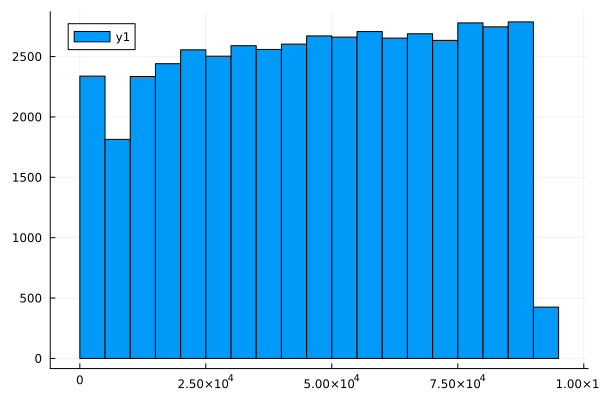

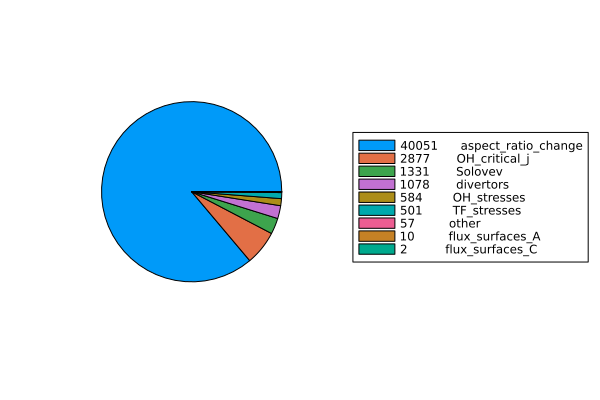

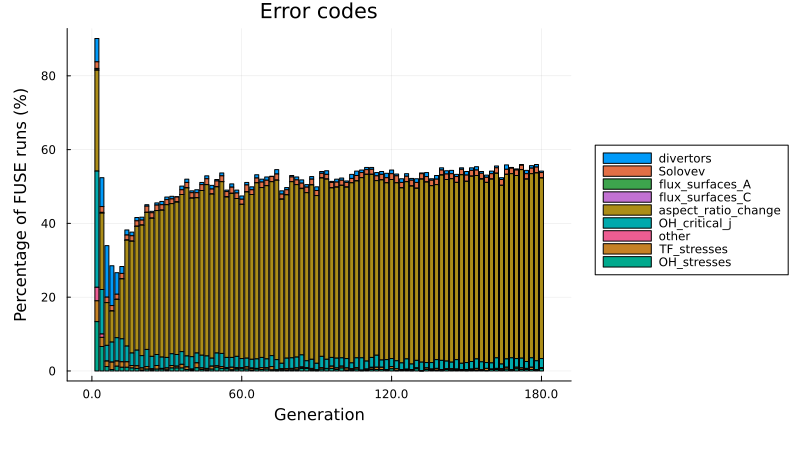

In [18]:
using StatsPlots

cache_path = joinpath(result_path, "opt_runs/")
all_dirs = filter(isdir, sort(readdir(cache_path; join=true)))
println(length(all_dirs))

dirs = sort(filter(x -> !isfile(joinpath(x, "error.txt")) && isfile(joinpath(x, "dd.json")), all_dirs))
println(length(dirs))

errors = FUSE.categorize_errors(all_dirs; do_plot=true, show_first_line=false)
err = errors[:other][end]
#println(read(err * "/error.txt",String))

x = Dict()
h = Dict()
ngen = (length(all_dirs)+5*256) / 256 / 2
nbins = Int(ngen / 2)
bins = StepRange(1,floor(length(all_dirs) ÷ nbins),length(all_dirs))

for key in keys(errors)
    x[key] = indexin(errors[key],sort(all_dirs))
    h[key] = []
    for (b0,b1) in zip(bins[1:end-1],bins[2:end])
        n = length(findall((x[key] .< b1) .* (x[key] .> b0)))
        h[key] = [h[key]; n]
    end
end

data = [h[key] for key in keys(errors)]
nticks = 4
xticks = (0:nbins/(nticks-1):nbins, [string(x) for x in LinRange(0,ngen,nticks)])

g = groupedbar(convert(Matrix{Int},reduce(hcat, data)) ./ (length(all_dirs)/nbins) * 100, 
    bar_position=:stack,
    label=String.(reduce(hcat,keys(errors))),
    xlabel="Generation",
    ylabel="Percentage of FUSE runs (%)",
    title ="Error codes",
    legend=:outerright,
    xticks=xticks,
    left_margin = 5Plots.mm,
    bottom_margin = 8Plots.mm,
    )

display(plot(g,size=(800,450)))


## Visualize Optimzation results

### Load optimization results file

In [19]:
con = []

try
    @load joinpath(result_path, "result.jld2") result
    for c in result.convergence
        con = [con; c]
    end
catch
    display("Could not find result.jld2")
end

try
    @load joinpath(result_path, "result2.jld2") result2
    for c in result2.convergence
        con = [con; c]
    end
catch
    display("Could not find result2.jld2")
end

try
    @load joinpath(result_path, "result3.jld2") result3
    for c in result3.convergence
        con = [con; c]
    end
catch
    display("Could not find result3.jld2")
end

### Plot f, x, g evolution

In [20]:
import Metaheuristics: optimize, ECA, SMS_EMOA, SPEA2, TestProblems, pareto_front, Options, convergence
using Plots.PlotMeasures
# generate plots

fnames = [ "βn", "Cost (\$B)"]
xnames = ["R0 (m)", "P0 (MPa)", "Ip (MA)", "fGW", "fGWped", "Paux (MW)"]
xfac = [1, 1e6, 1e6, 1, 1, 1e6]
gnames = ["Pnet (%)", "Sn (%)", "EC access (%)", "fLH (%)", "qpol (%)", "ds03 (%)"]

pf = plot(layout=(2,1), size=(650,650),left_margin=15mm)
px = plot(layout=(6,1), size=(650,1500),left_margin=15mm)
pg = plot(layout=(6,1), size=(650,1500),left_margin=15mm)

for i in 1:1:length(con)
    A = pareto_front(con[i])
    B = con[i].population
    
    pop_x = reduce(hcat, [j.x for j in B])'
    pop_f = reduce(hcat, [j.f for j in B])'
    pop_g = reduce(hcat, [j.g for j in B])'
    
    for j in 1:2
        scatter!(pf[j], repeat([i],length(pop_f[:,j])), pop_f[:,j], marker_z=pop_f[:,1], clim=(0,5), colorbar=:none, legend=:none, ylabel=fnames[j], yrange=(0,10))
    end
    
    for j in 1:6
        scatter!(px[j], repeat([i],length(pop_x[:,j])), pop_x[:,j]/xfac[j], marker_z=pop_f[:,1], clim=(0,5), colorbar=:none, legend=:none, ylabel=xnames[j])
    end
    
    for j in 1:6
        scatter!(pg[j], repeat([i],length(pop_g[:,j])), pop_g[:,j], marker_z=pop_f[:,1], clim=(0,5), colorbar=:none, legend=:none, ylabel=gnames[j], yrange=(-1,0.5))
    end

end

#display(pf)
#display(px)
#display(pg)

### Define function for scatter plot of ith generation

In [27]:
function scatter_gen(con,igen,xlabel,ylabel,
        xrange,yrange,
        fnames,xnames,gnames)
    
    pop = Dict()
    pf = Dict()
    pfi = []

    # assemble function values
    for (i,fname) in enumerate(fnames)
        str = split(fname, " ")
        pop[str[1]] = [x.f[i] for x in con[igen].population]
        pf[str[1]] = pareto_front(con[igen])[:,i]
    end

    # assemble input values
    for (i,xname) in enumerate(xnames)
        str = split(xname, " ")
        pop[str[1]] = [x.x[i] for x in con[igen].population]
    end

    # assemble constraint values
    for (i,gname) in enumerate(gnames)
        str = split(gname, " ")
        pop[str[1]] =  [x.g[i] for x in con[igen].population]
    end

    # re-scale constraint values
    @. pop["Pnet"] = min_Pelectric*(1-pop["Pnet"])
    @. pop["fLH"] = min_fLH*(1-pop["fLH"])
    
    @. pop["accessEC"] = max_accessEC*(1+pop["accessEC"])
    @. pop["Sn"] = max_Sn*(1+pop["Sn"])
    @. pop["qpol"] = max_qpol*(1+pop["qpol"])
    @. pop["ds03"] = max_ds03*(1+pop["ds03"])

    # make array of pareto-optimal indices
    for pf in pf[fnames[1]]
        index = findfirst(isequal(pf), pop[fnames[1]])
        pfi = [pfi;[index]]
    end

    # assemble pareto-optimal input values
    for (i,xname) in enumerate(xnames)
        str = split(xname, " ")
        pf[str[1]] = pop[str[1]][pfi]
    end

    # assemble pareto-optimal constraint values
    for (i,gname) in enumerate(gnames)
        str = split(gname, " ")
        pf[str[1]] = pop[str[1]][pfi]
    end

    ## PLOT

    s1 = scatter(pop[xlabel], pop[ylabel], color=:grey, label="Population", alpha=0.7)
    s2 = scatter!(s1, pf[xlabel], pf[ylabel], color=:red, label="Pareto-optimal")
    s = plot(s2, size=(450, 450), title="Generation: "*string(igen), xlabel=xlabel, ylabel=ylabel, xrange=xrange, yrange=yrange) 
    
    return s
    
end

scatter_gen (generic function with 1 method)

### Make gif of population evolution

[ Info: Saved animation to /fusion/ga/projects/ird/ptp/weisbergd/julia/dev/FUSE/playground/weisberg_FPP_opt/nominal/opt_betaN_cost__Solovev_Kr_flattop24_HTS0.1_qpol2.75_A3.5_Zeff2.0_Bt7.0/βn_cost.gif


Plots.AnimatedGif("/fusion/ga/projects/ird/ptp/weisbergd/julia/dev/FUSE/playground/weisberg_FPP_opt/nominal/opt_betaN_cost__Solovev_Kr_flattop24_HTS0.1_qpol2.75_A3.5_Zeff2.0_Bt7.0/βn_cost.gif")
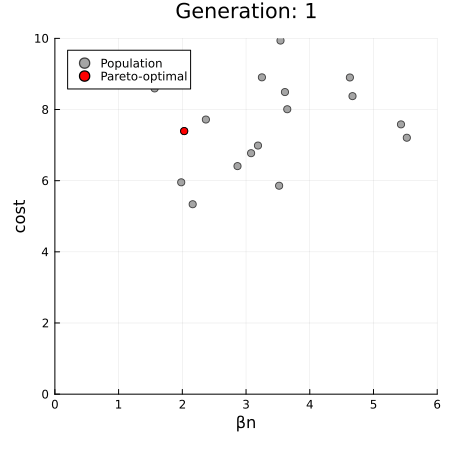

In [28]:
xnames = ["R0 (m)", "P0 (MPa)", "Ip (MA)", "fGW", "fGWped", "Paux (MW)"]
gnames = ["Pnet (%)", "Sn (%)", "accessEC (%)", "fLH (%)", "qpol (%)", "ds03 (%)"]
fnames = ["βn", "cost [\$B]"]

min_Pelectric = 200.0 # MW
min_fLH = 1.0

max_Sn = 1.5
max_qpol = 2.75e3 # MW/m^2
max_ds03 = 1.0
max_accessEC = 1.0

xlabel = "βn"
xrange = (0,6)

ylabel = "cost"
yrange = (0.0,10)

gen_list = 1:1:length(con)
gen_list = vcat(gen_list,repeat([length(con)],20))

a = @animate for igen in gen_list

    s = scatter_gen(con,igen,xlabel,ylabel,xrange,yrange,fnames,xnames,gnames)
    
end

g = gif(a, joinpath(result_path, xlabel*"_"*ylabel*".gif"), fps=10)
display(g)

### Static plots

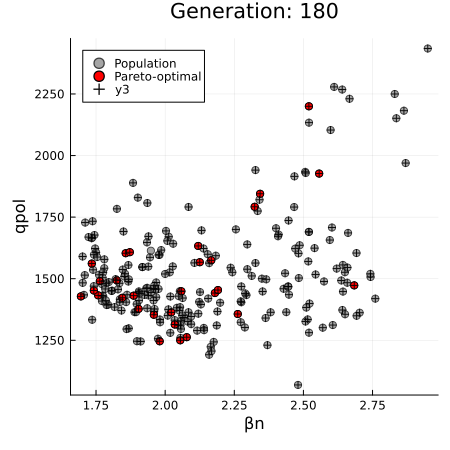

In [31]:
xlabel = "βn"
ylabel = "qpol"

xrange = :missing
yrange = :missing

s = scatter_gen(con,gen_list[end],xlabel,ylabel,xrange,yrange,fnames,xnames,gnames)

scatter!(s,outputs[:,"βn_MHD"],outputs[:,"qpol"],markershape=:+,color=:black)

